In [1]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import random
import json

# Requests sends and receives HTTP requests
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

#used if i need wildcard in bs
import re

import time
import pprint


In [2]:
# Import and clean movie list

budgets_df = pd.read_csv('data/budgets_pd.csv')
movies = budgets_df['title'].tolist()

cleaned = []
for string in movies:
    clean = re.sub(r'[\xc2-\xf4][\x80-\xbf]+',lambda m: m.group(0).encode('latin1').decode('utf8'),string)
    cleaned.append(clean)
print(cleaned)

['Avengers: Endgame', 'Pirates of the Caribbean: On Stranger Tides', 'Avengers: Age of Ultron', 'Star Wars Ep. VII: The Force Awakens', 'Avengers: Infinity War', 'Pirates of the Caribbean: At World’s End', 'Justice League', 'Spectre', 'Star Wars: The Rise of Skywalker', 'Solo: A Star Wars Story', 'John Carter', 'Batman v Superman: Dawn of Justice', 'The Lion King', 'Tangled', 'Spider-Man 3', 'Captain America: Civil War', 'Harry Potter and the Half-Blood Prince', 'The Hobbit: The Desolation of Smaug', 'The Hobbit: The Battle of the Five Armies', 'The Fate of the Furious', 'No Time to Die', 'Avatar', 'Superman Returns', 'The Dark Knight Rises', 'Pirates of the Caribbean: Dead Men Tell No Tales', 'Quantum of Solace', 'The Avengers', 'Pirates of the Caribbean: Dead Man’s Chest', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Lone Ranger', 'Tenet', 'The Amazing Spider-Man', 'Battleship', 'Transformers: The Last Knight', 'Jurassic World', 'Men in Black 3', 'Transformers: Re

In [ ]:
# Open Chrome browser with Selenium

driver = webdriver.Chrome(executable_path='/Users/Michael/DSI/.bin/chromedriver')

In [ ]:
# Set/Reset driver to main page and search next term

driver.get('http://www.google.com')
sleep(2)

search = driver.find_element_by_name('q')
search.click()
sleep(1)

search.send_keys(f'{movies[0]} budget\n')



In [5]:
# Format movie list for Google search URL form

movies_formatted = []
for string in cleaned:
    form = string.replace(' ', '%20')
    movies_formatted.append(form)

Avengers:%20Endgame
Pirates%20of%20the%20Caribbean:%20On%20Stranger%20Tides
Avengers:%20Age%20of%20Ultron
Star%20Wars%20Ep.%20VII:%20The%20Force%20Awakens
Avengers:%20Infinity%20War
Pirates%20of%20the%20Caribbean:%20At%20World’s%20End
Justice%20League
Spectre
Star%20Wars:%20The%20Rise%20of%20Skywalker
Solo:%20A%20Star%20Wars%20Story
John%20Carter
Batman%20v%20Superman:%20Dawn%20of%20Justice
The%20Lion%20King
Tangled
Spider-Man%203
Captain%20America:%20Civil%20War
Harry%20Potter%20and%20the%20Half-Blood%20Prince
The%20Hobbit:%20The%20Desolation%20of%20Smaug
The%20Hobbit:%20The%20Battle%20of%20the%20Five%20Armies
The%20Fate%20of%20the%20Furious
No%20Time%20to%20Die
Avatar
Superman%20Returns
The%20Dark%20Knight%20Rises
Pirates%20of%20the%20Caribbean:%20Dead%20Men%20Tell%20No%20Tales
Quantum%20of%20Solace
The%20Avengers
Pirates%20of%20the%20Caribbean:%20Dead%20Man’s%20Chest
Man%20of%20Steel
The%20Chronicles%20of%20Narnia:%20Prince%20Caspian
The%20Lone%20Ranger
Tenet
The%20Amazing%20Spider-

Oz%20the%20Great%20and%20Powerful
X-Men:%20Days%20of%20Future%20Past
The%20Amazing%20Spider-Man%202
Cars%202
Fast%20&%20Furious%20Presents:%20Hobbs%20&%20Shaw
Tron:%20Legacy
2012
Fantastic%20Beasts:%20The%20Crimes%20of%20Grindelwald
Terminator%20Salvation
Green%20Lantern
Prince%20of%20Persia:%20Sands%20of%20Time
Dark%20Phoenix
Mulan
Transformers:%20Dark%20of%20the%20Moon
The%20Mummy
Jack%20the%20Giant%20Slayer
Furious%207
Star%20Trek%20Into%20Darkness
World%20War%20Z
The%20Great%20Gatsby
Disney’s%20A%20Christmas%20Carol
Pacific%20Rim
The%20Good%20Dinosaur
Iron%20Man
The%20Dark%20Knight
Indiana%20Jones%20and%20the%20Kingdom%20of%20the%20Crystal%20Skull
Brave
Kong:%20Skull%20Island
Star%20Trek%20Beyond
Maleficent:%20Mistress%20of%20Evil
Blade%20Runner%202049
Terminator:%20Dark%20Fate
Aladdin
Thor:%20Ragnarok
The%20Chronicles%20of%20Narnia:%20The%20Lion,%20the%20Witch%20a…
Maleficent
Fantastic%20Beasts%20and%20Where%20to%20Find%20Them
WALL-E
Rush%20Hour%203
The%20Legend%20of%20Tarzan
Hugo

Monsters%20University
Oz%20the%20Great%20and%20Powerful
X-Men:%20Days%20of%20Future%20Past
The%20Amazing%20Spider-Man%202
Cars%202
Fast%20&%20Furious%20Presents:%20Hobbs%20&%20Shaw
Tron:%20Legacy
2012
Fantastic%20Beasts:%20The%20Crimes%20of%20Grindelwald
Terminator%20Salvation
Green%20Lantern
Prince%20of%20Persia:%20Sands%20of%20Time
Dark%20Phoenix
Mulan
Transformers:%20Dark%20of%20the%20Moon
The%20Mummy
Jack%20the%20Giant%20Slayer
Furious%207
Star%20Trek%20Into%20Darkness
World%20War%20Z
The%20Great%20Gatsby
Disney’s%20A%20Christmas%20Carol
Pacific%20Rim
The%20Good%20Dinosaur
Iron%20Man
The%20Dark%20Knight
Indiana%20Jones%20and%20the%20Kingdom%20of%20the%20Crystal%20Skull
Brave
Kong:%20Skull%20Island
Star%20Trek%20Beyond
Maleficent:%20Mistress%20of%20Evil
Blade%20Runner%202049
Terminator:%20Dark%20Fate
Aladdin
Thor:%20Ragnarok
The%20Chronicles%20of%20Narnia:%20The%20Lion,%20the%20Witch%20a…
Maleficent
Fantastic%20Beasts%20and%20Where%20to%20Find%20Them
WALL-E
Rush%20Hour%203
The%20Leg

Monsters%20University
Oz%20the%20Great%20and%20Powerful
X-Men:%20Days%20of%20Future%20Past
The%20Amazing%20Spider-Man%202
Cars%202
Fast%20&%20Furious%20Presents:%20Hobbs%20&%20Shaw
Tron:%20Legacy
2012
Fantastic%20Beasts:%20The%20Crimes%20of%20Grindelwald
Terminator%20Salvation
Green%20Lantern
Prince%20of%20Persia:%20Sands%20of%20Time
Dark%20Phoenix
Mulan
Transformers:%20Dark%20of%20the%20Moon
The%20Mummy
Jack%20the%20Giant%20Slayer
Furious%207
Star%20Trek%20Into%20Darkness
World%20War%20Z
The%20Great%20Gatsby
Disney’s%20A%20Christmas%20Carol
Pacific%20Rim
The%20Good%20Dinosaur
Iron%20Man
The%20Dark%20Knight
Indiana%20Jones%20and%20the%20Kingdom%20of%20the%20Crystal%20Skull
Brave
Kong:%20Skull%20Island
Star%20Trek%20Beyond
Maleficent:%20Mistress%20of%20Evil
Blade%20Runner%202049
Terminator:%20Dark%20Fate
Aladdin
Thor:%20Ragnarok
The%20Chronicles%20of%20Narnia:%20The%20Lion,%20the%20Witch%20a…
Maleficent
Fantastic%20Beasts%20and%20Where%20to%20Find%20Them
WALL-E
Rush%20Hour%203
The%20Leg

In [6]:
# Grab url
driver.get('http://www.google.com/search?q={movies_formatted[0]%20budget}')

NameError: name 'driver' is not defined

In [7]:
r = requests.get('http://www.google.com/search?q={movies_formatted[0]%20budget}')
r.status_code

200

In [ ]:
#JAWS example
#class="kp-header" for search results of budget
#class="mod NFQxe" for area with ratings
# example imdb area class="NY3LVe" and specifically in there class="wDgjf" title="IMDb"
#with class="gsrt IZACzd" for the rating. same classes for Rotten Tomatoes
# but with title="Rotten Tomatoes" and title="Metacritic"

#Director found at <a class="fl" href="..."> div class above class="Z1h0Ce"
#span class="Lrzxr kno-fv" all under div class="mod" data-attrid="kc:/film/film:director"

# Writers under div class="mod" data-attrid="kc:/film/film:screenplay" span class and 
# 'a class' listed as same as director above

#Top Billed Cast under div class="zVvuGd MRfBrb" -> div class="PZPZlf MRfBrb kno-vrt-t"
#has a href="..." title="(Actor name (character played))"
#Names found under div class="fl ellip oBrLN S1gFKb l6aqpd" data-original-name="(Actors name)"

In [18]:
pprint.pprint(r)

<Response [200]>


('<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta '
 'content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" '
 'itemprop="image"><title>{movies_formatted[0] budget} - Google '
 'Search</title><script nonce="GWJPd1ttDdBr3Z2qA0WYBw==">(function(){\n'
 'document.documentElement.addEventListener("submit",function(b){var '
 'a;if(a=b.target){var '
 'c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else '
 'a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var '
 'a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break '
 'a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\n'
 'var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var '
 'c=a.timing;if(c){var '
 'd=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break '
 'a
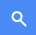

In [8]:
pprint.pprint(r.text)

In [25]:
soup = BeautifulSoup(r.text, 'html.parser')

In [20]:
clean_soup = re.sub(r'[\xc2-\xf4][\x80-\xbf]+',lambda m: m.group(0).encode('latin1').decode('utf8'), r.text)

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>{movies_formatted[0] budget} - Google Search</title><script nonce="GWJPd1ttDdBr3Z2qA0WYBw==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=
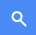

In [24]:
print(BeautifulSoup(clean_soup, 'html.parser'))

In [26]:
results = []
for g in soup.find_all('div', class_='r'):
    anchors = g.find_all('a')
    if anchors:
        link = anchors[0]['href']
        title = g.find('h3').text
        item = {
            "title": title,
            "link": link
        }
        results.append(item)
print(results)

[]
